#Линейная регрессия.

In [ ]:
# import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns
# import os
# import re
# from lightgbm import LGBMRegressor
# from scipy import stats
# from scipy.stats import shapiro
from sklearn import metrics # , preprocessing
# from sklearn.ensemble import (GradientBoostingRegressor, RandomForestRegressor,
#                               StackingRegressor)
# from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OrdinalEncoder
# from xgboost import XGBRegressor
# import optuna
# import pickle
import joblib

In [ ]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train MAE: {:.2f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.2f}%'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('Train R^2: {:.2f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('\n')
    print('Test MAE: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.2f}%'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))
    print('Test R^2: {:.2f}'.format(metrics.r2_score(y_test, y_test_predict)))
    
def print_test(y_test, y_test_pred):
  y_t = []
  y_t_p = []
  cnt = 0
  for i in range(len(y_test)):
    if cnt < len(y_test):
      y_t.append(y_test[cnt])
      y_t_p.append(y_test_pred[cnt])
      cnt += 1000
    else:
      break
  return(y_t, y_t_p)

In [ ]:
X_train_scaled = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/X_train_scaled.zip')
X_test_scaled = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/X_test_scaled.zip')
y_train = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/y_test.csv')
y_train = y_train['target'].tolist()
y_test = y_test['target'].tolist()
y_train_log = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/y_train_log.csv')
y_train_log = y_train_log['target'].tolist()

In [ ]:
# Инициализируем объект линейной регрессии.
lr = LinearRegression()
# Обучим модель.
lr.fit(X_train_scaled, y_train_log)

# # Производим сериализацию и записываем обученную модель в файл формата pkl
# with open('lr.pkl', 'wb') as output:
#     pickle.dump(lr, output)

# Производим сериализацию и сохраняем результат в файл формата .joblib
joblib.dump(lr, '/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/fit_models/lr.joblib')

# # Производим десериализацию и извлекаем модель из файла формата pkl
# with open('lr.pkl', 'rb') as pkl_file:
#       lr = pickle.load(pkl_file)

# Предскажем результат.
# Поскольку мы обучали модель с использованием логарифма, мы должны взять экспоненту результата (np.exp).
y_train_pred_lr = np.exp(lr.predict(X_train_scaled))
y_test_pred_lr = np.exp(lr.predict(X_test_scaled))

# Сохраним предсказание в файл.
# y_test_pred_lr.to_csv('y_test_pred_lr.csv')
np.savetxt("/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/y_test_pred/y_test_pred_lr.csv", y_test_pred_lr, delimiter=",")

# Покажем метрики.
print_metrics(y_train, y_train_pred_lr, y_test, y_test_pred_lr)

Train MAE: 257052.03
Train MAPE: 67.45%
Train R^2: 0.13


Test MAE: 256572.22
Test MAPE: 69.30%
Test R^2: 0.08


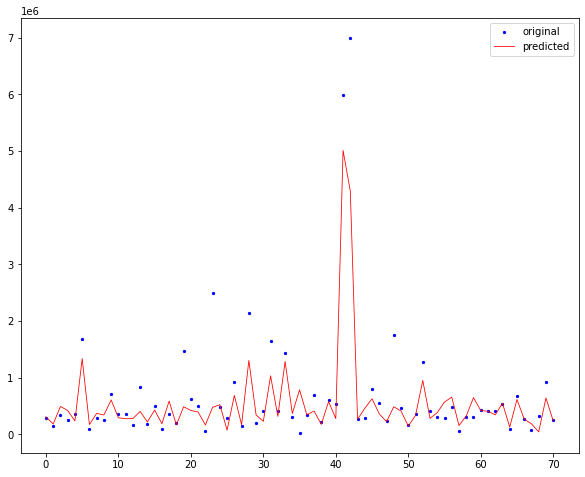

In [ ]:
# Возмём каждую 1000-ю строку из выборок, чтобы визуально убедиться в точности предсказаний.
y_t, y_t_p = print_test(y_test, y_test_pred_lr)

# Визуализируем предсказания на тестовой выборке.
x_ax = range(len(y_t))
plt.figure(figsize=(10,8))
# Точки тестовой выборки.
plt.scatter(x_ax, y_t, s=5, color="blue", label="original")
# График предсказаний.
plt.plot(x_ax, y_t_p, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
mae_lr = metrics.mean_absolute_error(y_test, y_test_pred_lr)
mape_lr = metrics.mean_absolute_percentage_error(y_test, y_test_pred_lr)*100
r2_lr = metrics.r2_score(y_test, y_test_pred_lr)

print(round(mae_lr, 2))
print(round(mape_lr, 2))
print(round(r2_lr, 2))

256572.22
69.3
0.08


Результаты значительно лучше, чем исходные.

Давайте попробуем другую модель.

---